# Linear Regression with Residual Analysis

In [1]:
import pandas as pd
import argparse
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn');

In [2]:
# scaffolding
df = pd.read_csv("LGA_diabetes_profiles.csv")
ndss = ['LGA Name', 'LGA status', 'People registering type 2 diabetes with NDSS']
dhhs = ['LGA Name', 'LGA status', 'People reporting type 2 diabetes']
factor = { 'name'    : 'LGA Name',
           'status'  : 'LGA status',
           'dndss'   : 'People registering type 2 diabetes with NDSS',
           'ddhhs'   : 'People reporting type 2 diabetes',
           'facility': 'LGA sport and recreational facilities count', 
           'sport'   : 'People who are members of a sports group',
           'physical': 'People who do not meet physical activity guidelines',
           'dietary' : 'People who do not meet dietary guidelines for either fruit or vegetable consumption'
          }

percentage = [v for k,v in factor.items() if v.startswith('People')]
ndss_facility = ndss + [factor['facility']]
ndss_sport    = ndss + [factor['sport']]
ndss_physical = ndss + [factor['physical']]
ndss_dietary  = ndss + [factor['dietary']]
dhhs_facility = dhhs + [factor['facility']]
dhhs_sport    = dhhs + [factor['sport']]
dhhs_physical = dhhs + [factor['physical']]
dhhs_dietary  = dhhs + [factor['dietary']]

# process numerical str-data to a sutiable dtype and drop a null record 
db = df[factor.values()].dropna()
for p in percentage:
    db[p] = db[p].str.rstrip('%').astype('float')

# know the min and max for each field for setting plot's boundaries 
# print(db.describe())

# use to differentiate the LGA status for each record in a given scatterplot
colour = []
for i in db[factor['status']]:
    if   i == 'Shire': colour.append(0);
    elif i == 'Rural City': colour.append(1);
    elif i == 'City': colour.append(2);
    elif i == 'Borough': colour.append(3);
db['colour'] = colour

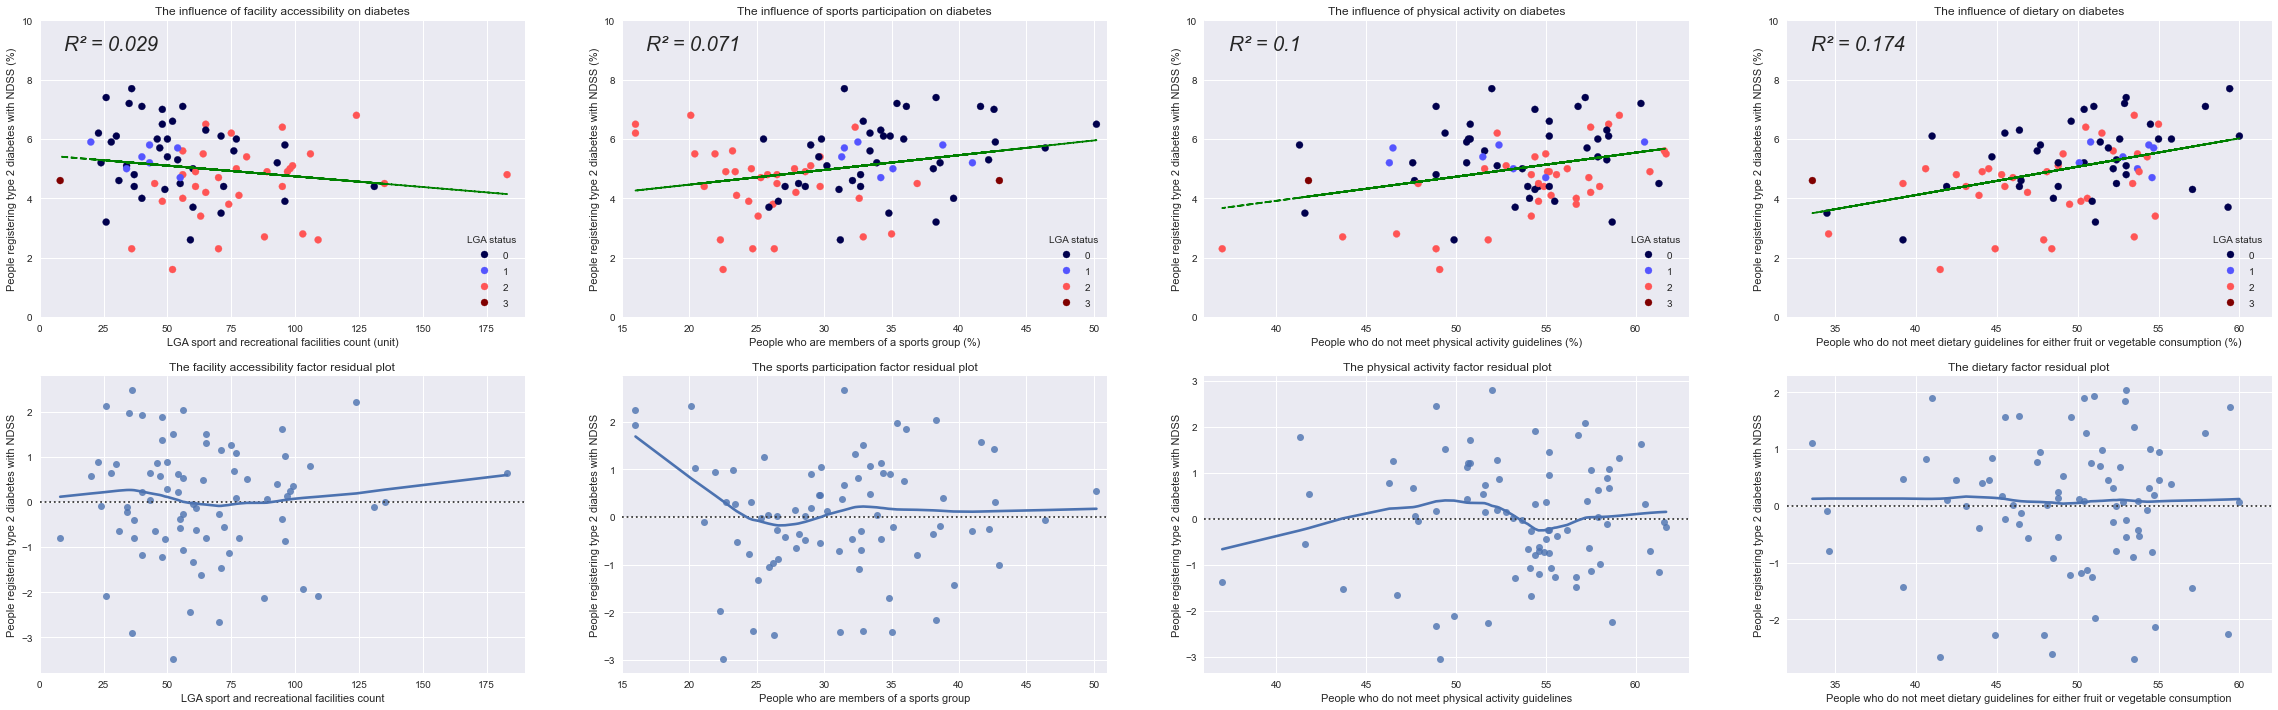

In [3]:
# NDSS diabetes scatter plot with four factors
fig_ndss, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(2, 4, figsize=(40, 12))

# ====================================== #
# (1) NDSS diabetes v. facility count
scatter = ax0.scatter(
                    x=db[factor['facility']],
                    y=db[factor['dndss']],
                    c=db['colour'],cmap='seismic');
ax0.set(title="The influence of facility accessibility on diabetes",
       xlabel=factor['facility']+' (unit)',
       ylabel=factor['dndss']+' (%)');
ax0.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax0.set_ylim([0,10]);
ax0.set_xlim([0,190]);

# Linear Regression for ax0 ------------ #
x=np.array(db[factor['facility']])
y=np.array(db[factor['dndss']])

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = round(correlation_xy**2, 3)

ax0.text(0.05, 0.90, u"R\u00b2 = " + str(r_squared), style='italic', fontsize=20, transform=ax0.transAxes)

m, b = np.polyfit(x, y, 1)
ax0.plot(x, m*x + b, c='g', linestyle='--')

# residuals analysis ------------------- #
ax4.set(title="The facility accessibility factor residual plot");
ax4.set_xlim([0,190]);
sns.residplot(x=db[factor['facility']], y=db[factor['dndss']], lowess=True, ax=ax4)

# ====================================== #
# (2) NDSS diabetes v. sport-group participation (sport)
scatter = ax1.scatter(
                    x=db[factor['sport']],
                    y=db[factor['dndss']],
                    c=db['colour'],cmap='seismic');
ax1.set(title="The influence of sports participation on diabetes",
       xlabel=factor['sport']+' (%)',
       ylabel=factor['dndss']+' (%)');
ax1.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax1.set_ylim([0,10]);
ax1.set_xlim([15,51]);

# - Linear Regression for ax1 ---------- #
x=np.array(db[factor['sport']])
y=np.array(db[factor['dndss']])

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = round(correlation_xy**2, 3)

ax1.text(0.05, 0.90, u"R\u00b2 = " + str(r_squared), style='italic', fontsize=20, transform=ax1.transAxes)

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b, c='g', linestyle='--')

# residuals analysis ------------------- #
ax5.set(title="The sports participation factor residual plot");
ax5.set_xlim([15,51]);
sns.residplot(x=db[factor['sport']], y=db[factor['dndss']], lowess=True, ax=ax5)

# ====================================== #
# (3) NDSS diabetes v. sport-group participation (physical)
scatter = ax2.scatter(
                    x=db[factor['physical']],
                    y=db[factor['dndss']],
                    c=db['colour'],cmap='seismic');
ax2.set(title="The influence of physical activity on diabetes",
       xlabel=factor['physical']+' (%)',
       ylabel=factor['dndss']+' (%)');
ax2.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax2.set_ylim([0,10]);
ax2.set_xlim([36,63]);

# - Linear Regression for ax2 ---------- #
x=np.array(db[factor['physical']])
y=np.array(db[factor['dndss']])

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = round(correlation_xy**2, 3)

ax2.text(0.05, 0.90, u"R\u00b2 = " + str(r_squared), style='italic', fontsize=20, transform=ax2.transAxes)

m, b = np.polyfit(x, y, 1)
ax2.plot(x, m*x + b, c='g', linestyle='--')

# residuals analysis ------------------- #
ax6.set(title="The physical activity factor residual plot");
ax6.set_xlim([36,63]);
sns.residplot(x=db[factor['physical']], y=db[factor['dndss']], lowess=True, ax=ax6)

# ====================================== #
# (4) NDSS diabetes v. dietary guidelines
scatter = ax3.scatter(
                    x=db[factor['dietary']],
                    y=db[factor['dndss']],
                    c=db['colour'],cmap='seismic');
ax3.set(title="The influence of dietary on diabetes",
       xlabel=factor['dietary']+' (%)',
       ylabel=factor['dndss']+' (%)');
ax3.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax3.set_ylim([0,10]);
ax3.set_xlim([32,62]);

# - Linear Regression for ax3 ---------- #
x=np.array(db[factor['dietary']])
y=np.array(db[factor['dndss']])

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = round(correlation_xy**2, 3)

ax3.text(0.05, 0.90, u"R\u00b2 = " + str(r_squared), style='italic', fontsize=20, transform=ax3.transAxes)

m, b = np.polyfit(x, y, 1)
ax3.plot(x, m*x + b, c='g', linestyle='--')

# residuals analysis ------------------- #
ax7.set(title="The dietary factor residual plot");
ax7.set_xlim([32,62]);
sns.residplot(x=db[factor['dietary']], y=db[factor['dndss']], lowess=True, ax=ax7)

# ====================================== #
fig_ndss.savefig("analysis-plot-diabetes.png")


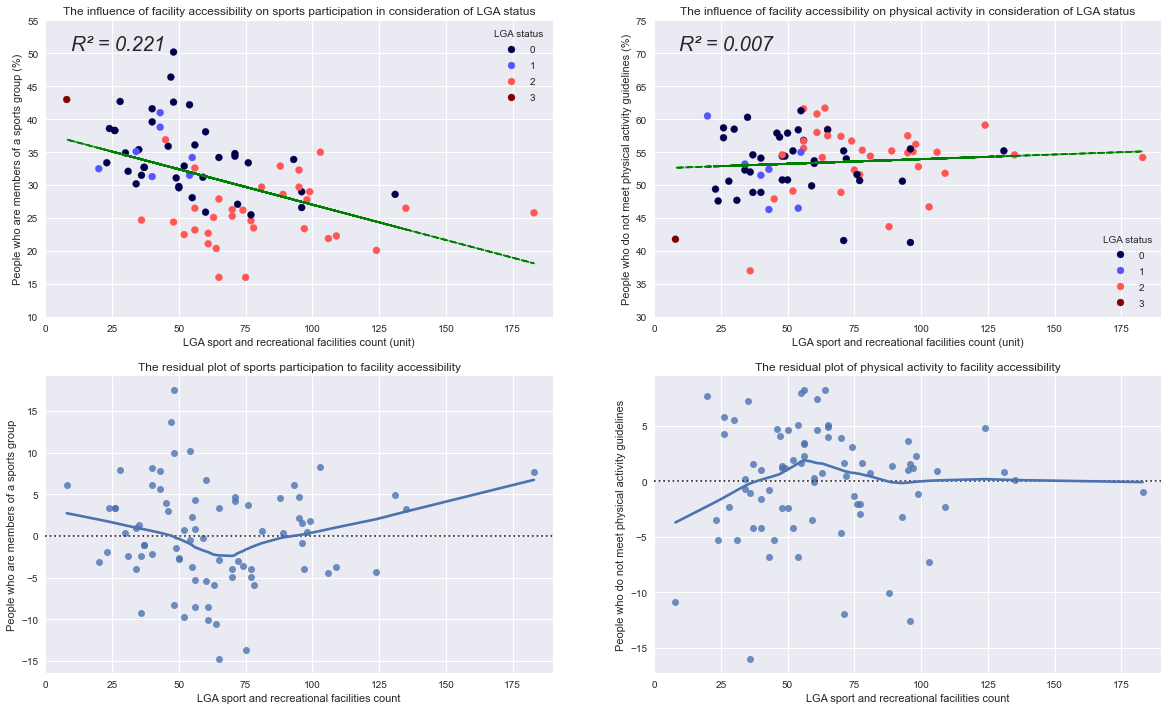

In [4]:
# Facility count influencing other factors
fig_facility, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# ====================================== #
# NDSS diabetes v. sports participation
scatter = ax0.scatter(
                    x=db[factor['facility']],
                    y=db[factor['sport']],
                    c=db['colour'],cmap='seismic');
ax0.set(title="The influence of facility accessibility on sports participation in consideration of LGA status",
       xlabel=factor['facility']+' (unit)',
       ylabel=factor['sport']+' (%)');
ax0.legend(*scatter.legend_elements(), title='LGA status', loc='upper right')
ax0.set_xlim([0,190]);
ax0.set_ylim([10,55]);

# Linear Regression for ax0 ------------ #
x=np.array(db[factor['facility']])
y=np.array(db[factor['sport']])

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = round(correlation_xy**2, 3)
ax0.text(0.05, 0.90, u"R\u00b2 = " + str(r_squared), style='italic', fontsize=20, transform=ax0.transAxes)
m, b = np.polyfit(x, y, 1)
ax0.plot(x, m*x + b, c='g', linestyle='--')

# residuals analysis ------------------- #
ax2.set(title="The residual plot of sports participation to facility accessibility");
ax2.set_xlim([0,190]);
sns.residplot(x=db[factor['facility']], y=db[factor['sport']], lowess=True, ax=ax2)

# ====================================== #
# NDSS diabetes v. physical activity
scatter = ax1.scatter(
                    x=db[factor['facility']],
                    y=db[factor['physical']],
                    c=db['colour'],cmap='seismic');
ax1.set(title="The influence of facility accessibility on physical activity in consideration of LGA status",
       xlabel=factor['facility']+' (unit)',
       ylabel=factor['physical']+' (%)');
ax1.legend(*scatter.legend_elements(), title='LGA status', loc='lower right')
ax1.set_xlim([0,190]);
ax1.set_ylim([30,75]);

# Linear Regression for ax1 ------------ #
x=np.array(db[factor['facility']])
y=np.array(db[factor['physical']])

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = round(correlation_xy**2, 3)
ax1.text(0.05, 0.90, u"R\u00b2 = " + str(r_squared), style='italic', fontsize=20, transform=ax1.transAxes)
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b, c='g', linestyle='--')

# residuals analysis ------------------- #
ax3.set(title="The residual plot of physical activity to facility accessibility");
ax3.set_xlim([0,190]);
sns.residplot(x=db[factor['facility']], y=db[factor['physical']], lowess=True, ax=ax3)

# ====================================== #
fig_facility.savefig("analysis-plot-facility.png")